<a href="https://colab.research.google.com/github/helnappaul/Data-Science-Project-Series/blob/main/stock_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory Data Analysis (EDA):

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('stock data.csv')

In [ ]:
df

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0.0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0.0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0.0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0.0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4483,2022-11-10,9.660000,9.960000,9.210000,9.480000,9.480000,85200,ASYS,55.097595,62.761506,...,10.02,65.384566,65.811946,65.384566,65.811946,-0.427380,2.566265,0.850000,9.849368,1.0
4484,2022-11-11,9.600000,10.640000,9.510000,10.390000,10.390000,33600,ASYS,64.868211,51.447974,...,10.64,88.532112,72.673075,88.532112,72.673075,15.859037,1.012048,0.210000,2.062869,0.0
4485,2022-11-14,10.800000,10.800000,10.190000,10.400000,10.400000,12300,ASYS,64.957981,47.649118,...,10.80,82.905960,78.940879,82.905960,78.940879,3.965080,0.370482,0.030001,0.289303,0.0
4486,2022-11-15,10.450000,10.870000,10.100000,10.150000,10.150000,33700,ASYS,60.796531,51.503809,...,10.87,70.124468,80.520847,70.124468,80.520847,-10.396378,1.015060,0.380000,3.889459,0.0


In [ ]:
df.shape

(4488, 1285)

In [ ]:
column_names = df.columns
print(column_names)

Index(['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker',
       'RSIadjclose15', 'RSIvolume15',
       ...
       'high-15', 'K-15', 'D-15', 'stochastic-k-15', 'stochastic-d-15',
       'stochastic-kd-15', 'volumenrelativo', 'diff', 'INCREMENTO', 'TARGET'],
      dtype='object', length=1285)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4488 entries, 0 to 4487
Columns: 1285 entries, date to TARGET
dtypes: float64(1281), int64(2), object(2)
memory usage: 44.0+ MB
None


In [ ]:
df.tail()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
4483,2022-11-10,9.66,9.96,9.21,9.48,9.48,85200,ASYS,55.097595,62.761506,...,10.02,65.384566,65.811946,65.384566,65.811946,-0.427380,2.566265,0.850000,9.849368,1.0
4484,2022-11-11,9.60,10.64,9.51,10.39,10.39,33600,ASYS,64.868211,51.447974,...,10.64,88.532112,72.673075,88.532112,72.673075,15.859037,1.012048,0.210000,2.062869,0.0
4485,2022-11-14,10.80,10.80,10.19,10.40,10.40,12300,ASYS,64.957981,47.649118,...,10.80,82.905960,78.940879,82.905960,78.940879,3.965080,0.370482,0.030001,0.289303,0.0
4486,2022-11-15,10.45,10.87,10.10,10.15,10.15,33700,ASYS,60.796531,51.503809,...,10.87,70.124468,80.520847,70.124468,80.520847,-10.396378,1.015060,0.380000,3.889459,0.0
4487,2022-11-16,10.20,10.32,9.99,10.15,10.15,16000,ASYS,60.796531,48.348981,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.head()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0.0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0.0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0.0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0.0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0.0


In [ ]:
df.describe()

,open,high,low,close,adjclose,volume,RSIadjclose15,RSIvolume15,RSIadjclose25,RSIvolume25,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
count,4488.000000,4488.000000,4488.000000,4488.000000,4488.000000,4.488000e+03,4218.000000,4218.000000,4038.000000,4038.000000,...,4235.000000,4150.000000,4108.000000,4150.000000,4108.000000,4108.000000,4272.000000,4402.000000,4402.000000,4487.000000
mean,48.243041,49.151139,47.296637,48.218426,47.775043,7.553624e+05,47.875518,49.848800,48.108158,49.931107,...,52.307863,39.176249,39.163338,39.176249,39.163338,0.143662,inf,-0.304854,0.545376,0.193002
std,129.279254,131.354808,126.996846,129.213875,127.634937,1.910499e+06,12.615483,5.141797,9.546384,3.443076,...,139.019712,33.994005,32.181454,33.994005,32.181454,11.937167,NaN,9.564138,11.707027,0.394699
min,0.410000,0.435000,0.405000,0.408000,0.408000,0.000000e+00,7.260120,35.303213,17.693637,39.520876,...,0.510000,-93.116989,-93.056298,-93.116989,-93.056298,-66.666667,0.000000,-90.538818,-29.411767,0.000000
25%,4.100000,4.200000,4.020000,4.090000,3.997965,2.019500e+04,38.999516,47.208428,41.528352,48.296440,...,4.600000,12.173776,13.720822,12.173776,13.720822,-6.369396,0.658188,-0.420000,-4.379306,0.000000
50%,9.980000,10.020000,9.930000,9.970000,9.960000,1.326500e+05,47.428497,48.332037,47.717704,48.971008,...,10.230000,36.934645,36.789054,36.934645,36.789054,0.000000,1.002004,-0.009999,-0.100606,0.000000
75%,18.900000,19.214999,18.299999,18.862500,18.862500,8.784500e+05,55.603932,50.884230,54.181105,50.567246,...,20.895000,66.668786,65.472318,66.668786,65.472318,6.448427,1.621084,0.240131,3.080766,0.000000
max,795.739990,799.359985,784.960022,797.489990,783.376221,5.342840e+07,96.365095,99.622735,91.023108,97.782293,...,799.359985,100.000000,100.000000,100.000000,100.000000,66.666667,inf,120.256775,250.318539,1.000000


In [ ]:
df.isnull().sum()

date                  0
open                  0
high                  0
low                   0
close                 0
                   ... 
stochastic-kd-15    380
volumenrelativo     216
diff                 86
INCREMENTO           86
TARGET                1
Length: 1285, dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

date                0
open                0
high                0
low                 0
close               0
                   ..
stochastic-kd-15    0
volumenrelativo     0
diff                0
INCREMENTO          0
TARGET              0
Length: 1285, dtype: int64

In [ ]:
df

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
98,2022-05-24,13.81,14.120,13.61,14.10,14.10,74700,ASLE,47.575179,48.098729,...,15.09,57.142875,47.186159,57.142875,47.186159,9.956716,0.644521,-0.060000,-0.423732,0.0
99,2022-05-25,14.10,14.320,14.05,14.18,14.18,71400,ASLE,48.459097,47.832464,...,14.76,70.707082,59.066871,70.707082,59.066871,11.640211,0.616048,0.210000,1.503221,0.0
100,2022-05-26,14.12,14.347,13.79,13.82,13.82,89700,ASLE,44.815889,49.493682,...,14.76,52.525237,60.125065,52.525237,60.125065,-7.599827,0.773943,0.510000,3.831707,0.0
101,2022-05-27,14.01,14.250,13.94,14.11,14.11,84800,ASLE,48.178500,49.045623,...,14.76,67.171696,63.468005,67.171696,63.468005,3.703691,0.731665,0.060000,0.427049,0.0
102,2022-05-31,14.14,14.140,13.53,13.86,13.86,315400,ASLE,45.611408,65.015137,...,14.76,52.127632,57.274855,52.127632,57.274855,-5.147223,2.721311,0.750000,5.720824,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4482,2022-11-09,9.74,9.950,9.25,9.46,9.46,29200,ASYS,54.839969,52.089826,...,10.02,64.102547,70.928406,64.102547,70.928406,-6.825859,0.879518,0.690000,7.867726,1.0
4483,2022-11-10,9.66,9.960,9.21,9.48,9.48,85200,ASYS,55.097595,62.761506,...,10.02,65.384566,65.811946,65.384566,65.811946,-0.427380,2.566265,0.850000,9.849368,1.0
4484,2022-11-11,9.60,10.640,9.51,10.39,10.39,33600,ASYS,64.868211,51.447974,...,10.64,88.532112,72.673075,88.532112,72.673075,15.859037,1.012048,0.210000,2.062869,0.0
4485,2022-11-14,10.80,10.800,10.19,10.40,10.40,12300,ASYS,64.957981,47.649118,...,10.80,82.905960,78.940879,82.905960,78.940879,3.965080,0.370482,0.030001,0.289303,0.0


In [ ]:
df.isna().sum()

date                0
open                0
high                0
low                 0
close               0
                   ..
stochastic-kd-15    0
volumenrelativo     0
diff                0
INCREMENTO          0
TARGET              0
Length: 1285, dtype: int64

In [ ]:
correlation_matrix = df.corr()

<ipython-input-20-68bbfff3c4eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [ ]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [ ]:
correlation_matrix

,open,high,low,close,adjclose,volume,RSIadjclose15,RSIvolume15,RSIadjclose25,RSIvolume25,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
open,1.000000,0.999880,0.999907,0.999718,0.999716,0.040542,0.076703,-0.021573,0.077914,-0.016358,...,0.997842,0.094746,0.104369,0.094746,0.104369,-0.012837,-0.057105,-0.053645,-0.010108,0.007260
high,0.999880,1.000000,0.999904,0.999912,0.999909,0.041364,0.077828,-0.019361,0.078664,-0.013983,...,0.997870,0.096691,0.105124,0.096691,0.105124,-0.009290,-0.056048,-0.052111,-0.009791,0.008220
low,0.999907,0.999904,1.000000,0.999873,0.999866,0.040418,0.077713,-0.022536,0.078569,-0.017183,...,0.997707,0.095915,0.104571,0.095915,0.104571,-0.010014,-0.057357,-0.054807,-0.010398,0.006769
close,0.999718,0.999912,0.999873,1.000000,0.999996,0.041334,0.079243,-0.020068,0.079758,-0.014607,...,0.997604,0.098291,0.105615,0.098291,0.105615,-0.006010,-0.056276,-0.052391,-0.010012,0.007766
adjclose,0.999716,0.999909,0.999866,0.999996,1.000000,0.041191,0.079731,-0.020075,0.080363,-0.014611,...,0.997562,0.098744,0.106112,0.098744,0.106112,-0.006065,-0.056275,-0.052194,-0.009956,0.007772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
stochastic-kd-15,-0.012837,-0.009290,-0.010014,-0.006010,-0.006065,0.020555,0.138157,0.079522,0.074470,0.068371,...,-0.012084,0.312954,-0.034590,0.312954,-0.034590,1.000000,0.014689,0.023593,0.003225,0.012346
volumenrelativo,-0.057105,-0.056048,-0.057357,-0.056276,-0.056275,0.214834,0.066915,0.727018,0.078803,0.789822,...,-0.056135,-0.020045,-0.026438,-0.020045,-0.026438,0.014689,1.000000,0.022433,0.003786,-0.001158
diff,-0.053645,-0.052111,-0.054807,-0.052391,-0.052194,0.028350,-0.023312,0.066683,-0.033751,0.073424,...,-0.044331,0.016407,0.008679,0.016407,0.008679,0.023593,0.022433,1.000000,0.241678,0.291935
INCREMENTO,-0.010108,-0.009791,-0.010398,-0.010012,-0.009956,-0.073586,0.047481,0.048938,0.025665,0.039948,...,-0.008273,0.069027,0.071460,0.069027,0.071460,0.003225,0.003786,0.241678,1.000000,0.560491


In [ ]:
import seaborn as sns

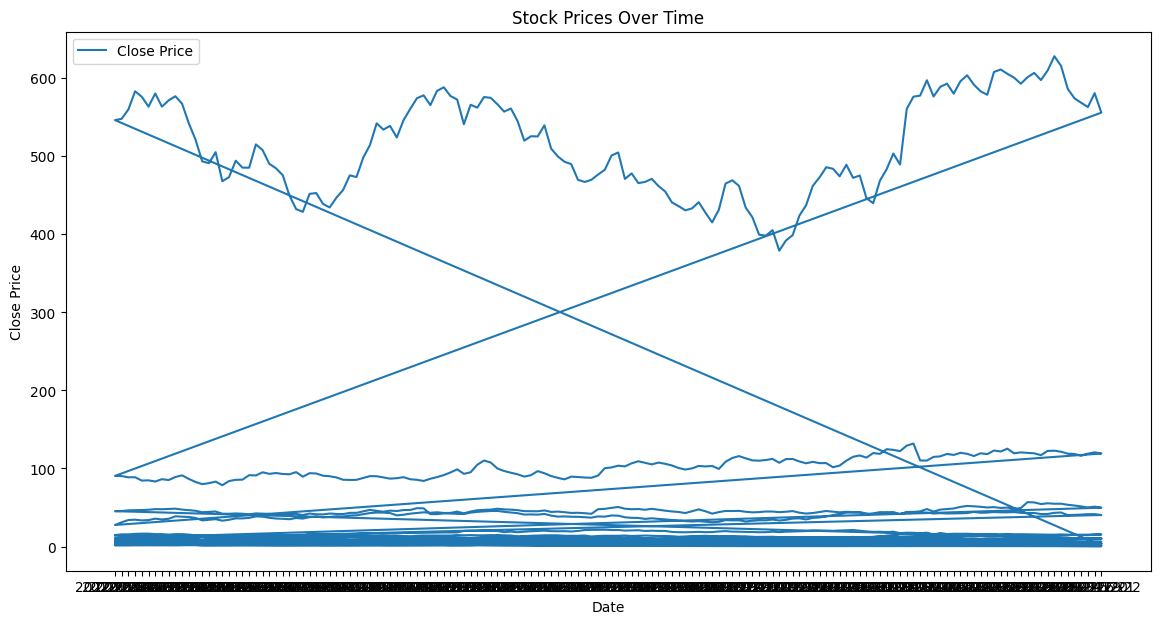

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Prices Over Time')
plt.legend()
plt.show()

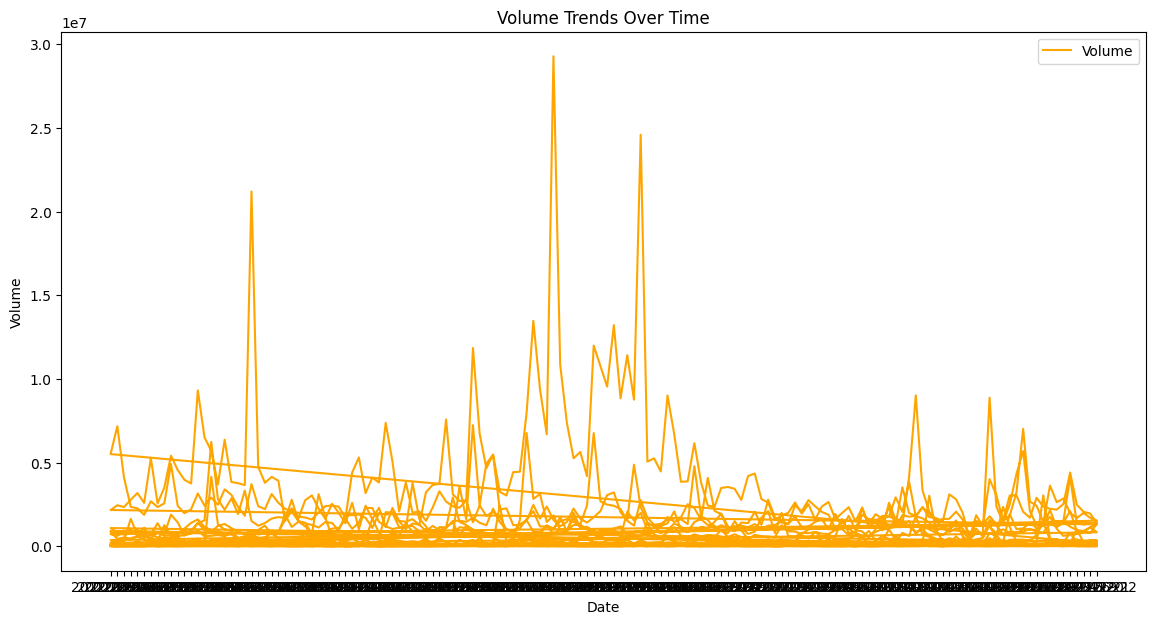

In [ ]:
# Plotting volume trends over time
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['volume'], label='Volume', color='orange')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume Trends Over Time')
plt.legend()
plt.show()


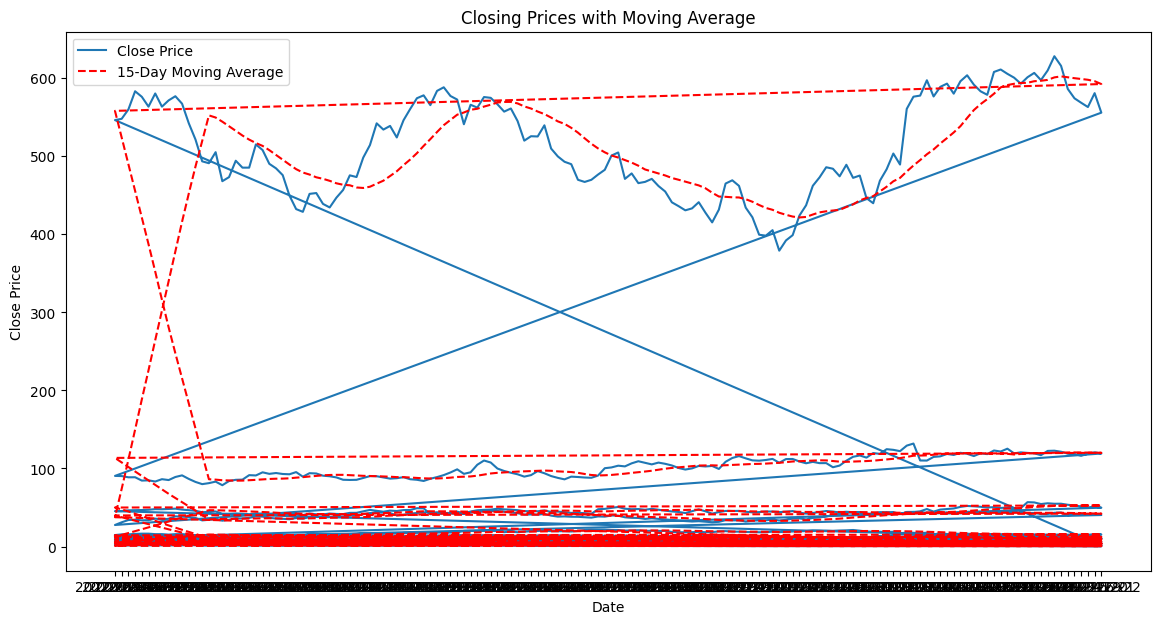

In [ ]:
# Plotting moving average of closing prices
window_size = 15  # You can adjust the window size based on your preference
df['MA_close'] = df['close'].rolling(window=window_size).mean()

plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['close'], label='Close Price')
plt.plot(df['date'], df['MA_close'], label=f'{window_size}-Day Moving Average', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Closing Prices with Moving Average')
plt.legend()
plt.show()


In [ ]:
print(df.isnull().sum())

date                0
open                0
high                0
low                 0
close               0
                   ..
volumenrelativo     0
diff                0
INCREMENTO          0
TARGET              0
MA_close           14
Length: 1286, dtype: int64


In [ ]:
df_cleaned = df.dropna()

In [ ]:
print("\nNull values after removal:")
print(df_cleaned.isnull().sum())


Null values after removal:
date               0
open               0
high               0
low                0
close              0
                  ..
volumenrelativo    0
diff               0
INCREMENTO         0
TARGET             0
MA_close           0
Length: 1286, dtype: int64


Predictive Modeling:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
features = df[['open', 'high', 'low', 'volume', 'RSIadjclose15', 'RSIvolume15']]

In [ ]:
target = df['TARGET']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Build a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
predictions = model.predict(X_test_scaled)


In [ ]:
print(predictions)

[ 0.2118054   0.25777784  0.21863712  0.25033131  0.22720965  0.23207663
  0.22115185  0.22145031  0.24016907  0.24101352  0.22423891  0.23307834
  0.238732    0.23732478  0.17529073  0.21520836  0.21672848  0.24579187
  0.22852686  0.24430258  0.23482033  0.21338604  0.25292636  0.23255287
  0.23006144  0.23465164  0.22103725  0.21863538  0.21934391  0.22287162
  0.25311982  0.21870924  0.23406352  0.25795264  0.27738538  0.22641016
  0.24646084  0.3006815   0.26240877  0.22440165  0.24093315  0.22797233
  0.24523333  0.22930824  0.2391505   0.23051988  0.21222389  0.23366048
  0.25047986  0.22144252  0.22656209  0.21749985  0.22161531  0.27251147
  0.23511789  0.23469436  0.28085391  0.21622242  0.22120632  0.21711201
  0.23287232  0.21011227  0.23885346  0.29583133  0.27512434  0.23731931
  0.23795836  0.56976288  0.09932198  0.2237551   0.22826529  0.21733587
  0.21693825  0.22992745  0.6220062   0.22154577  0.22468125  0.25706426
  0.23639765  0.2302428   0.24236498  0.21649802  0

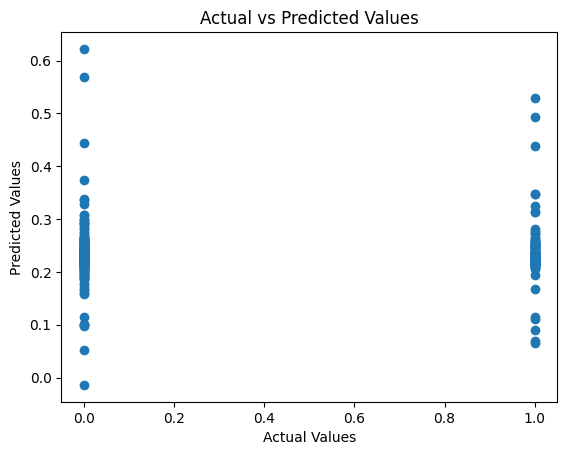

In [ ]:
 plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()